# IST 691 Deep Learning in Practice

**Homework 2**

Name:Zane Alderfer

SUID:503765874

*Save this notebook into your Google Drive. The notebook has appropriate comments at the top of code cells to indicate whether you need to modify them or not. Answer your questions directly in the notebook. Remember to use the GPU as your runtime. Once finished, run ensure all code blocks are run, download the notebook and submit through Blackboard.*

### Q1

Explain the differences between convolutional neural networks and a multi-layer perceptron. Explain whether the following statement is true, and if true, when it could be true.

'An MLP can represent the same functions as a CNN.'

Some of the differences between a CNN and MLP would be the structure and parameter sharing.  A CNN are specifically used for processing grid-like data such as images.  There are convolutional layers followed by pooling layers and typically end with fully connected layers.  CNNs also use parameter sharing and local connectivity and this allows the CNN to develop spatial hierarchies which allows the network to effective at identifying image.  An MLP have a more general purpose.  They have input, hidden and output layers with each layer connected to the next layer.  MLPs are used moreso for text or tabular data where the relationships between inputs and outputs are more complex.  MLPs do not use spatial arrangements as these networks deal with text not images.  Yes they technically can represent the same functions but MLPs wouldn't be the most effective choice for grid-like data.  

### Q2

In class, we saw an example of autoencoders being able to remove the noise of an image. Explain why this happens and what the limits of such funcionality are.

Autoencoders have encoders and decoders which train to reconstruct input data.  The encoder compresses the input image while capturing the essential parts of the image.  The decoder then takes the compressed image and attempts to reconstruct the original image from it.  Some limitations could be the amount of "noise" in the image or maybe dealing with certain types of noise that is too complex to deconstruct.  Autoencoders may also remove useful information during the compression process and lead to loss of essential detail.

### Q3

When using transfer learning models, sometimes we get better results by fine-tuning, and some other times we get better results by freezing the parameters before training. Under what circumstances should we fine-tune the model in order to get a better result? And, under what circumstances should we freeze the parameters instead?

Fine-tuning is better for large datasets that are similar to trained model.  Fine-tuning is also better with task-specific features such as dealing with pre-trained models learned features with slight adjustments for the new dataset.  Fine-tuning is also great at generalizing data to avoid overfitting.  Freezing, however, is better with limited data and also better if the new dataset is significantly different from the original dataset.  Freezing is also better when computational resources are limited.

### Q4: MLP vs CNN

Below, there are two neural networks for classifying MNIST digits: `model_mlp`  is an MLP with no hidden layers (the smallest possible) and 7,850 parameters. Evaluate the performance of this model below.

Then, define a convolutional neural network with similar a number of parameters and evaluate its performance. Can it do better? Why?

In [1]:
# DO NOT MODIFY THIS CELL

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_mlp = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_mlp.summary()

2024-05-13 16:48:06.446753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or 

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_mlp.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_mlp.fit(x_train,
              y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_split = 0.1,
              verbose = 1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.7290 - accuracy: 0.8178 - val_loss: 0.3559 - val_accuracy: 0.9143
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8977 - val_loss: 0.2870 - val_accuracy: 0.9253
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.9086 - val_loss: 0.2656 - val_accuracy: 0.9287
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3110 - accuracy: 0.9140 - val_loss: 0.2512 - val_accuracy: 0.9318
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2977 - accuracy: 0.9171 - val_loss: 0.2428 - val_accuracy: 0.9335
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.9199 - val_loss: 0.2379 - val_accuracy: 0.9362
Epoch 7/15
422/422 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.9210 - val_loss: 0.2332 - val_accuracy: 0.9368
Epoch 

In [3]:
# DO NOT MODIFY CELL
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2641875147819519
Test accuracy: 0.9277999997138977


In [4]:
# DEFINE YOUR OWN CNN SO THAT THE PARAMETERS ARE FEWER THAN THE MLP
model_cnn = keras.Sequential(
    [
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 128)              

In [5]:
# one possible answer that acheives ~98% test accuracy
# and has 7,178 trainable parameters
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32,2, activation = 'relu'),
        layers.Conv2D(32,2, activation = 'relu'),
        layers.MaxPooling2D(8),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2890      
                                                                 
Total params: 7178 (28.04 KB)
Trainable params: 7178 (28.04 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [6]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_cnn.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 35s 80ms/step - loss: 0.7736 - accuracy: 0.7643 - val_loss: 0.2362 - val_accuracy: 0.9302
Epoch 2/15
422/422 [==============================] - 34s 81ms/step - loss: 0.2299 - accuracy: 0.9274 - val_loss: 0.1583 - val_accuracy: 0.9517
Epoch 3/15
422/422 [==============================] - 34s 81ms/step - loss: 0.1786 - accuracy: 0.9426 - val_loss: 0.1308 - val_accuracy: 0.9592
Epoch 4/15
422/422 [==============================] - 34s 81ms/step - loss: 0.1501 - accuracy: 0.9520 - val_loss: 0.1154 - val_accuracy: 0.9643
Epoch 5/15
422/422 [==============================] - 34s 80ms/step - loss: 0.1317 - accuracy: 0.9584 - val_loss: 0.1009 - val_accuracy: 0.9680
Epoch 6/15
422/422 [==============================] - 38s 89ms/step - loss: 0.1187 - accuracy: 0.9634 - val_loss: 0.0916 - val_accuracy: 0.9688
Epoch 7/15
422/422 [==============================] - 35s 83ms/step - loss: 0.1077 - accuracy: 0.9666 - val_loss: 0.0868 - val_accuracy:

In [7]:
# DO NOT MODIFY CELL
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0721391960978508
Test accuracy: 0.9782000184059143


**Did the CNN do better than the MLP? Why or why not?**

Yes the CNN did perform better than the MLP.  This is due to CNN having better parameter effciency than the MLP network.  CNNs are generally more parameter efficient when involving grid-like data.

### Q5: Transfer learning

We are going to classify beans using transfer learning (read more about the dataset [here](https://www.tensorflow.org/datasets/catalog/beans). In the code below, use the `ResNet50` model available in Keras to classify the beans dataset (3 classes). **Do not fine tune `ResNet50`**. What is the performance?

In [10]:
# DO NOT MODIFY CELL
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    'beans',
    split = ['train[:70%]', 'train[:30%]'], # train/test split
    batch_size = -1,
    as_supervised = True  # include labels
)

# resizing images
train_ds = tf.image.resize(train_ds, (200, 200))
test_ds = tf.image.resize(test_ds, (200, 200))

# transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=3)
test_labels = to_categorical(test_labels, num_classes=3)

2024-05-13 17:21:02.191633: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /Users/zanealderfer/tensorflow_datasets/beans/0.1.0.incompleteTO5QY5/beans-train.tfrecord*...:   0%|…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /Users/zanealderfer/tensorflow_datasets/beans/0.1.0.incompleteTO5QY5/beans-validation.tfrecord*...: …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /Users/zanealderfer/tensorflow_datasets/beans/0.1.0.incompleteTO5QY5/beans-test.tfrecord*...:   0%| …

Dataset beans downloaded and prepared to /Users/zanealderfer/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [15]:
# IMPORT THE APPROPRIATE MODEL HERE
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

## loading ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False

## preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(3, activation = 'softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    layers.Dropout(0.2),
    prediction_layer
])

In [16]:
# DO NOT MODIFY CELL
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [17]:
# DO NOT MODIFY CELL
model.fit(train_ds, train_labels, epochs = 5, validation_split = 0.2, batch_size = 64)

Epoch 1/5
10/10 [==============================] - 82s 8s/step - loss: 5.5374 - accuracy: 0.5976 - val_loss: 5.7108 - val_accuracy: 0.7103
Epoch 2/5
10/10 [==============================] - 71s 7s/step - loss: 1.4625 - accuracy: 0.8584 - val_loss: 5.1462 - val_accuracy: 0.7172
Epoch 3/5
10/10 [==============================] - 70s 7s/step - loss: 0.3383 - accuracy: 0.9568 - val_loss: 3.0000 - val_accuracy: 0.7862
Epoch 4/5
10/10 [==============================] - 73s 7s/step - loss: 0.1774 - accuracy: 0.9793 - val_loss: 2.9811 - val_accuracy: 0.7793
Epoch 5/5
10/10 [==============================] - 71s 7s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.4850 - val_accuracy: 0.7862


In [18]:
# DO NOT MODIFY CELL
score = model.evaluate(test_ds, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.008390230126678944
Test accuracy: 0.9967741966247559


### Q6: Autoencoder

Modify the convolutional autoencoder for MNIST we saw in class so that the embedding has the following structure:
- Conv2D: 8 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 3 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 1 filters, Kernel (3, 3)

After making this change, you need to change the input size of the decoder function so that it can accept the output of the encoder. What is the performance of your model?

In [30]:
# DO NOT MODIFY THIS CELL
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
import np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import h5py

# data now has a different shape
random_seed = 42
np.random.seed(random_seed)

# load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# cast the sample data to the current Keras floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# reshape to 2D grid, one line per image
X_train = X_train.reshape(X_train.shape[0], number_of_pixels)
X_test = X_test.reshape(X_test.shape[0], number_of_pixels)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# reshape sample data to 4D tensor using channels_last convention
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [31]:
# MODIFY THE ENCODER BELOW ACCORDING TO THE QUESTION REQUIREMENTS
CAE_encoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_1 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_conv_2 = Conv2D(3, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_2 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_output = Conv2D(1, (3, 3), activation = 'relu', padding = 'same')


In [33]:
# DO NOT MODIFY THIS CELL
CAE_encoder_input = Input(shape=(28, 28, 1))
CAE_decoder_up_1 = UpSampling2D((2,2))
CAE_decoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_decoder_up_2 = UpSampling2D((2,2))
CAE_decoder_output = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')

CAE_encoder_step_1 = CAE_encoder_conv_1(CAE_encoder_input)
CAE_encoder_step_2 = CAE_encoder_pool_1(CAE_encoder_step_1)
CAE_encoder_step_3 = CAE_encoder_conv_2(CAE_encoder_step_2)
CAE_encoder_step_4 = CAE_encoder_pool_2(CAE_encoder_step_3)
CAE_encoder_step_5 = CAE_encoder_output(CAE_encoder_step_4)

CAE_decoder_step_1 = CAE_decoder_up_1(CAE_encoder_step_5)
CAE_decoder_step_2 = CAE_decoder_conv_1(CAE_decoder_step_1)
CAE_decoder_step_3 = CAE_decoder_up_2(CAE_decoder_step_2)
CAE_decoder_step_4 = CAE_decoder_output(CAE_decoder_step_3)


Conv_AE = Model(CAE_encoder_input, CAE_decoder_step_4)
Conv_AE.compile(optimizer = 'adam', loss = 'binary_crossentropy')


Conv_AE_encoder_only_model = Model(CAE_encoder_input, CAE_encoder_step_5)

In [34]:
# MODIFY THE INPUT FOR THE DECODER BELOW ACCORDING TO THE OUTPUT EXPECTED FROM THE ENCODER
Conv_AE_decoder_only_input = Input(shape=(28, 28, 1))

In [35]:
# DO NOT MODIFY THIS CELL
Conv_AE_decoder_only_step_1 = CAE_decoder_up_1(Conv_AE_decoder_only_input)
Conv_AE_decoder_only_step_2 = CAE_decoder_conv_1(Conv_AE_decoder_only_step_1)
Conv_AE_decoder_only_step_3 = CAE_decoder_up_2(Conv_AE_decoder_only_step_2)
Conv_AE_decoder_only_step_4 = CAE_decoder_output(Conv_AE_decoder_only_step_3)

Conv_AE_decoder_only_model = Model(Conv_AE_decoder_only_input, Conv_AE_decoder_only_step_4)

In [36]:
# DO NOT MODIFY THIS CELL
# FIT AND EVALUATE PERFORMANCE
Conv_AE.fit(X_train, X_train,
               epochs = 50, batch_size = 128, shuffle = True,
               verbose = 2,
               validation_data = (X_test, X_test))

Epoch 1/50
469/469 - 69s - loss: 0.2592 - val_loss: 0.1600 - 69s/epoch - 147ms/step
Epoch 2/50
469/469 - 46s - loss: 0.1468 - val_loss: 0.1362 - 46s/epoch - 99ms/step
Epoch 3/50
469/469 - 36s - loss: 0.1328 - val_loss: 0.1280 - 36s/epoch - 77ms/step
Epoch 4/50
469/469 - 37s - loss: 0.1263 - val_loss: 0.1227 - 37s/epoch - 79ms/step
Epoch 5/50
469/469 - 37s - loss: 0.1224 - val_loss: 0.1198 - 37s/epoch - 79ms/step
Epoch 6/50
469/469 - 36s - loss: 0.1194 - val_loss: 0.1168 - 36s/epoch - 76ms/step
Epoch 7/50
469/469 - 40s - loss: 0.1168 - val_loss: 0.1143 - 40s/epoch - 85ms/step
Epoch 8/50
469/469 - 36s - loss: 0.1145 - val_loss: 0.1122 - 36s/epoch - 76ms/step
Epoch 9/50
469/469 - 37s - loss: 0.1128 - val_loss: 0.1107 - 37s/epoch - 79ms/step
Epoch 10/50
469/469 - 39s - loss: 0.1114 - val_loss: 0.1095 - 39s/epoch - 84ms/step
Epoch 11/50
469/469 - 35s - loss: 0.1103 - val_loss: 0.1087 - 35s/epoch - 75ms/step
Epoch 12/50
469/469 - 35s - loss: 0.1094 - val_loss: 0.1078 - 35s/epoch - 75ms/step


In [37]:
# DO NOT MODIFY THIS CELL
def draw_predictions_set(predictions, filename = None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin = 0, vmax = 1, cmap = 'gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i + 6)
        plt.imshow(predictions[i].reshape(28, 28), vmin = 0, vmax = 1, cmap = 'gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

313/313 [==============================] - 4s 9ms/step


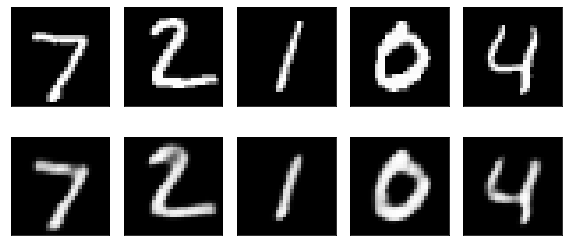

In [38]:
# Test your new predictions
Conv_predictions = Conv_AE.predict(X_test)
draw_predictions_set(Conv_predictions, 'NB3-ConvAE-predictions')